
# The Sparks Foundation - Data Science & Business Analytics
## Perform 'Prediction using Decision Tree'
In this task we will create the Decision Tree Classifier and visualize it .

Data Set can be found on Dataset: https://bit.ly/3kXTdox

Author -- **Sameh Farouk**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Mount my drive to load data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/datasets/'
import os
os.listdir(DATA_PATH)


['cifar-10-python.tar.gz', 'SampleSuperstore.csv', 'Iris.csv']

# Read Data

In [4]:
df=pd.read_csv(DATA_PATH +'Iris.csv')


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### There is no missing Data and Every Columns have the suitable type and the data is Normalized (because mean and median are close) and std not large

**1-Encoding Target Column (Species)**

to convert Categorical data to numerical

In [8]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()


X=df.drop(['Id','Species'],axis=1)
class_name = df['Species'].unique()
feature_name=df.drop(['Id'],axis=1).columns.values

y=lb.fit_transform(df['Species'])

2-split data

you can split data using (train_test_split) but doesnt guarantee to have the same distribution in train and test data So i will use (StratifiedShuffleSplit).


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

sss=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)

for train_idx , test_idx in sss.split(X,y):
  X_train , X_test=X.iloc[train_idx] , X.iloc[test_idx]
  y_train , y_test=y[train_idx] , y[test_idx]



**Base Model**

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models ={
    'logistic' : LogisticRegression(solver='liblinear'),
    'svm':SVC(),
    'tree':DecisionTreeClassifier(),
    'knn':KNeighborsClassifier()
}





evaluate what is the best model that fit well with your data

In [11]:
from sklearn.model_selection import cross_validate,KFold,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve

kfold= KFold(n_splits=5,shuffle=True,random_state=42)
final_res = {}
for model_name , model in models.items():
  scores = cross_val_score(model , X_train,y_train,scoring='accuracy',cv=kfold)
  final_res[model_name]=scores.mean()


print(f'the best score for models is {final_res} \n')

the best score for models is {'logistic': 0.9047619047619048, 'svm': 0.9714285714285713, 'tree': 0.9619047619047618, 'knn': 0.9714285714285713} 



One of Best Performance is Decision Tree Classifier , i will make hyperparameter tuning to this classifier

In [12]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [5, 15, 10],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3]   # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(model, param_grid, scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 15, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [13]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [14]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [15]:
grid_search.best_score_

0.9523809523809523

In [16]:
final_model = DecisionTreeClassifier(**grid_search.best_params_)
kfold= KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_validate(final_model , X_train,y_train,scoring='accuracy',cv=kfold,return_train_score=True)

val = scores['test_score']
train = scores['train_score']

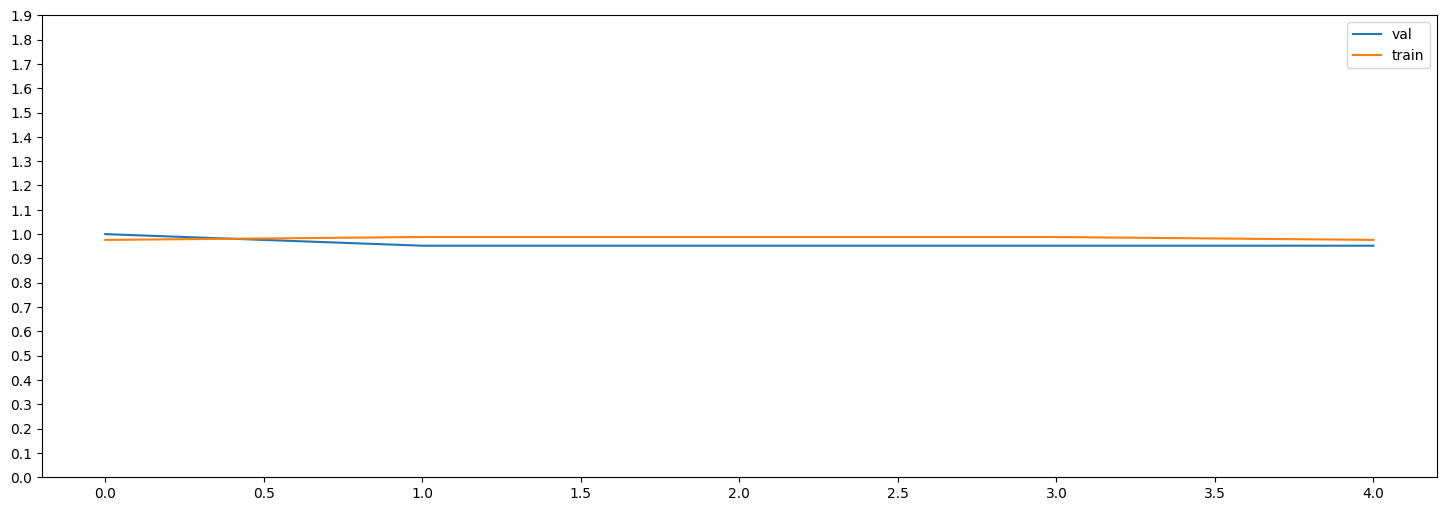

In [17]:
fig ,ax = plt.subplots(figsize=(18,6))
plt.plot(val,label='val')
plt.plot(train,label='train')
plt.yticks(np.arange(0,2,0.1))
plt.legend()
plt.show()

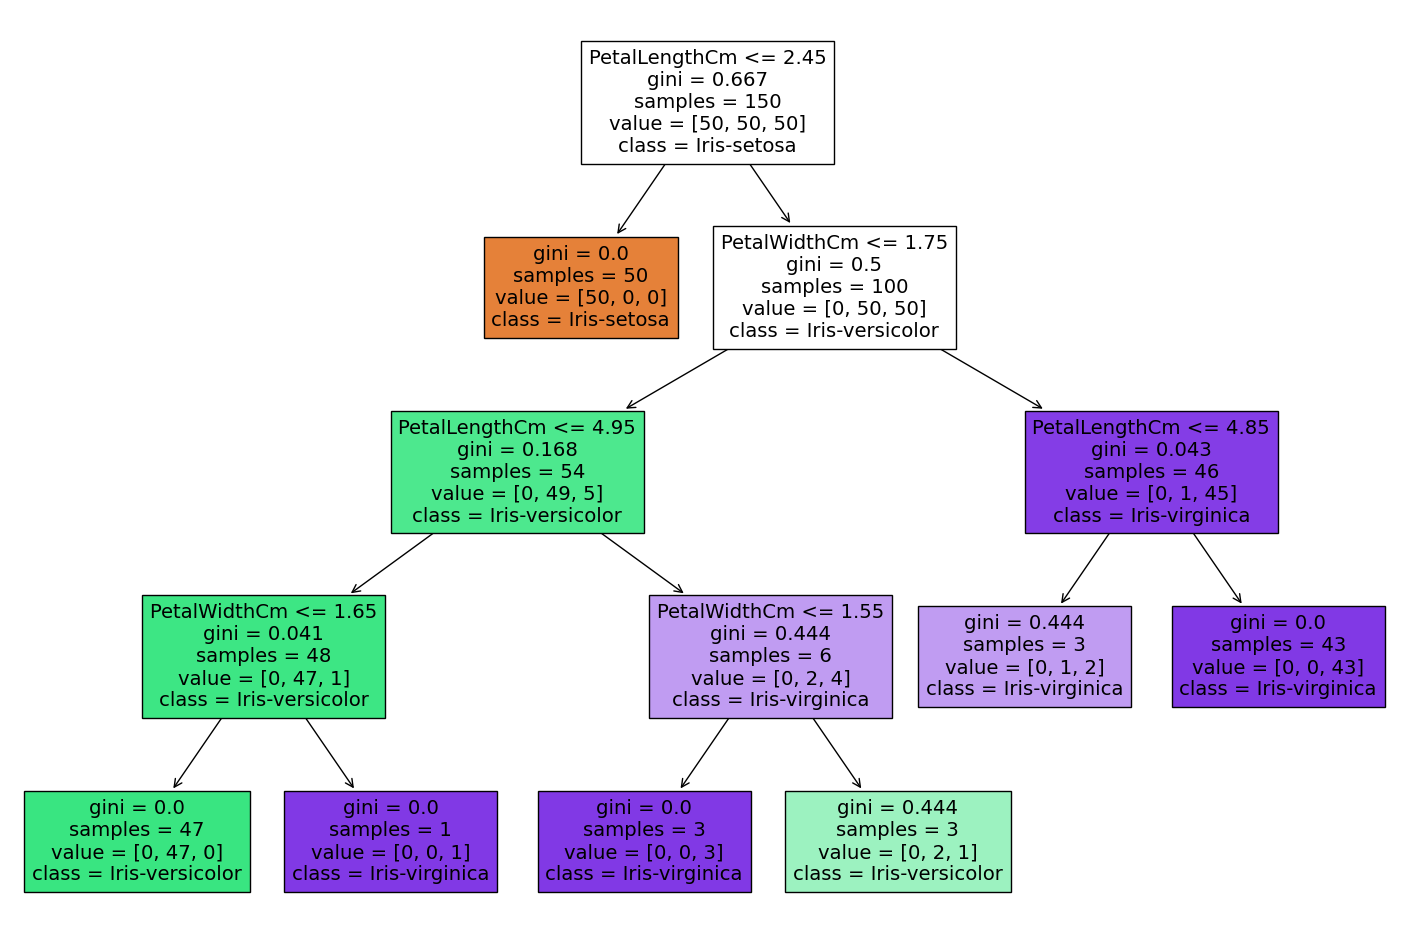

In [18]:
from sklearn import tree

final_model.fit(X,y)
fig, ax = plt.subplots(figsize=(18, 12))
tree.plot_tree(final_model, feature_names=feature_name, class_names=class_name, filled=True, ax=ax)
plt.show()